**Roman Schiffino**

Spring 2024

CS 251/2: Data Analysis and Visualization

Project 1: Data Analysis and Visualization

**Week 2: Start this after Week 2 lab (Lab 1b)**

## Task 2: Update `Data` class for data selection

You will update `Data` to allow the user to select one or more data variables based on their string name. This will give you some practice working with numpy basics.

Implement the following methods in `Data`:
- `get_all_data()`
- `head()`: Return the 1st five data samples (all variables)
- `tail()`: Return the last five data samples (all variables)
- `limit_samples(self, start_row, end_row)`: Update the data so that the object only stores the samples in the contiguous range `[start_row, end_row)`.
- `select_data(headers, rows=[])`: Return data samples corresponding to the variable names in `headers`. If `rows` is empty, return all samples, otherwise return samples at the indices specified by the `rows` list.

In [1]:
from data import Data
import numpy as np

# Automatically reload external modules
%load_ext autoreload
%autoreload 2

### 2a. Test `get_all_data`

#### (i) Basic test

In [ ]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
dat = iris_data.get_all_data()
dat[0,:] = -9999
new_dat = iris_data.get_all_data()
if new_dat[0, 0] == -9999.:
    print('!!You did not return a copy of your data!!\n')
else:
    print('get_all_data seems ok!')

#### (ii) Test with passing ndarray into constructor

In [ ]:
test_ii = np.arange(12).reshape([3, 4])
test_ii_data = Data(data=test_ii)
test_ii_data_get = test_ii_data.get_all_data()
print(f'After passing in test data ndarray into your Data object, the data returned is:\n{test_ii_data_get}')
print('It should be:')
print('''[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]]''')


### 2b. Test `head` and `tail`

#### (i) Iris

In [ ]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
print(f'Your Iris head (shape={iris_data.head().shape}) is:\n{iris_data.head()}')
print(f'Your Iris tail (shape={iris_data.head().shape}) is:\n{iris_data.tail()}')

You should see:

    Your Iris head (shape=(5, 5)) is:
    [[5.1 3.5 1.4 0.2 0. ]
    [4.9 3.  1.4 0.2 0. ]
    [4.7 3.2 1.3 0.2 0. ]
    [4.6 3.1 1.5 0.2 0. ]
    [5.  3.6 1.4 0.2 0. ]]
    Your Iris tail (shape=(5, 5)) is:
    [[6.7 3.  5.2 2.3 2. ]
    [6.3 2.5 5.  1.9 2. ]
    [6.5 3.  5.2 2.  2. ]
    [6.2 3.4 5.4 2.3 2. ]
    [5.9 3.  5.1 1.8 2. ]]

#### (ii) Data with small number of samples

In [ ]:
test_filename = 'data/test_data_spaces.csv'
test_data = Data(test_filename)
print(test_data.dTRef.__members__)
print(f'Your test head (shape={test_data.head().shape}) is:\n{test_data.head()}')
print(f'Your test tail (shape={test_data.head().shape}) is:\n{test_data.tail()}')


You should see:

    Your test head (shape=(3, 4)) is:
    [[ 1.  2.  3.  4.]
     [ 5.  6.  7.  8.]
     [ 9. 10. 11. 12.]]
    Your test tail (shape=(3, 4)) is:
    [[ 1.  2.  3.  4.]
     [ 5.  6.  7.  8.]
     [ 9. 10. 11. 12.]]

### 2c. Test `limit_samples`

In [ ]:
iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
iris_data.limit_samples(50, 100)
print(f'After limiting samples, your test head is:\n{iris_data.head()}')
print(f'After limiting samples, your test tail is:\n{iris_data.tail()}')

You should see:

    After limiting samples, your test head is:
    [[7.  3.2 4.7 1.4 1. ]
    [6.4 3.2 4.5 1.5 1. ]
    [6.9 3.1 4.9 1.5 1. ]
    [5.5 2.3 4.  1.3 1. ]
    [6.5 2.8 4.6 1.5 1. ]]
    After limiting samples, your test tail is:
    [[5.7 3.  4.2 1.2 1. ]
    [5.7 2.9 4.2 1.3 1. ]
    [6.2 2.9 4.3 1.3 1. ]
    [5.1 2.5 3.  1.1 1. ]
    [5.7 2.8 4.1 1.3 1. ]]

### 2d. Test `select_data`

#### (i) Test data with spaces

In [ ]:
test_filename = 'data/test_data_spaces.csv'
test_data = Data(test_filename)

one = test_data.select_data(['spaces'])
print(f'All data in the "spaces" variable (shape={one.shape}): \n{one}')

two = test_data.select_data(['spaces', 'places'])
print(f'All data in the "spaces" and "places" variables (shape={two.shape}): \n{two}')

You should see:

    All data in the "spaces" variable (shape=(3, 1)): 
    [[ 2.]
     [ 6.]
     [10.]]
    All data in the "spaces" and "places" variables (shape=(3, 2)): 
    [[ 2.  4.]
     [ 6.  8.]
     [10. 12.]]

#### (ii) Test data with spaces, some samples

In [ ]:
test_filename = 'data/test_data_spaces.csv'
test_data = Data(test_filename)

rows = [1, 2]

one = test_data.select_data(['spaces'], rows=rows)
print(f'All data in the "spaces" variable (shape={one.shape}): \n{one}')

two = test_data.select_data(['spaces', 'places'], rows=rows)
print(f'All data in the "spaces" and "places" variables (shape={two.shape}): \n{two}')

You should see:

    All data in the "spaces" variable (shape=(2, 1)): 
    [[ 6.]
     [10.]]
    All data in the "spaces" and "places" variables (shape=(2, 2)): 
    [[ 6.  8.]
     [10. 12.]]

#### (iii) Test data with spaces, non-contiguous samples

In [ ]:
test_filename = 'data/test_data_spaces.csv'
test_data = Data(test_filename)

rows = [0, 2]

one = test_data.select_data(['spaces'], rows=rows)
print(f'All data in the "spaces" variable (shape={one.shape}): \n{one}')

two = test_data.select_data(['bad', 'places'], rows=rows)
print(f'All data in the "bad" and "places" variables (shape={two.shape}): \n{two}')

You should see:

    All data in the "spaces" variable (shape=(2, 1)): 
    [[ 2.]
    [10.]]
    All data in the "bad" and "places" variables (shape=(2, 2)): 
    [[ 3.  4.]
    [11. 12.]]

## Task 3: `Analysis` class

In this task, you will implement the `Analysis` class that analyzes and visualizes complex datasets comprised of many variables. After creating `Analysis`, you’ll use it alongside your `Data` class to analyze an open-access scientific dataset. *Can you use the tools you’ve developed to extract real-world truths from data?*

You will build on this object-oriented approach to do advanced data analysis in future projects, making it easier for you to apply the tools you develop this week to a wide range of datasets.

It is crucial for your success in CS251 to become fluent in the **vectorization** of matrix operations (**NO LOOPS**) with Numpy and the visualization of data with Matplotlib. We will use these Python packages each and every week. Please bring your questions to class and office hours so that we can help you get comfortable with these essential tools before the math gets more complex and interesting.

In method docstrings that state that loops are not allowed, **we will take off points for every loop that we see — vectorized computations only in analysis functions!** You may use loops in plotting-related methods.

**TODO:**
- Download the `analysis.py` code template.

### Analysis and summary statistic methods

To actually perform computations on data, you will implement the following methods in `analysis.py`, modeled off of common functions in the `pandas` python package (https://pandas.pydata.org/pandas-docs/stable/user_guide/computation.html) that we will adopt later in the semester:

- `set_data(data)`
- `min(headers, rows=[])`: Computes the minimum of each variable in `headers` in the data object. Possibly only in a subset of data samples (`rows`) if `rows` is not empty.
- `max(headers, rows=[])`: Computes the maximum of each variable in `headers` in the data object.
- `range(headers, rows=[])`: Computes the range [min, max] for each variable in `headers` in the data object.
- `mean(headers, rows=[])`: Computes the mean for each variable in `headers` in the data object. Equation for mean: $$\bar{x} = \frac{1}{N} \sum_{i=1}^N x_i$$ where $x_i$ is the $i^{th}$ data sample and $N$ is the total number of data samples in the dataset.
- `var(headers, rows=[])`: Computes the variance for each variable in `headers` in the data object. Equation for sample variance: $$s^2 = \frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2$$ where $x_i$ is the $i^{th}$ data sample, $N$ is the total number of data samples in the dataset, $\bar{x}$ is the mean.
- `std(headers, rows=[])`: Computes the standard deviation for each variable in `headers` in the data object. Equation for sample standard deviation: $$s^2 = \sqrt{\frac{1}{N-1} \sum_{i=1}^N (x_i - \bar{x})^2}$$ where $x_i$ is the $i^{th}$ data sample, $N$ is the total number of data samples in the dataset, $\bar{x}$ is the mean.

In [3]:
from analysis import Analysis

iris_filename = 'data/iris.csv'
iris_data = Data(iris_filename)
an = Analysis(iris_data)

Reading data from file: data/iris.csv
Data extracted from file. 
Now processing data...

Data processing complete!


#### (i) Test `min`

In [ ]:
print(f"Your minimum values for length vars (all samples) are\n{an.min(['sepal_length', 'petal_length'])}\nand should be\n[4.3 1. ]")
print(f"Your minimum values for length vars (1st 10 samples) are\n{an.min(['sepal_length', 'petal_length'], rows=np.arange(10))}\nand should be\n[4.4 1.3]")
print(f"Your shape is {an.min(['sepal_length', 'petal_length']).shape}\nand should be (2,)")

#### (ii) Test `range`

In [ ]:
all_mins, all_maxs = an.range(['sepal_length', 'sepal_width'])
some_mins, some_maxs = an.range(['sepal_length', 'sepal_width'], rows=np.arange(10))
print(f"Your range for sepal vars (all samples) is\nmins:{all_mins}\nmaxs:{all_maxs}\nand should be\nmins:[4.3 2. ]\nmaxs:[7.9 4.4]\n")
print(f"Your range for sepal vars (1st 10 samples) is\nmins:{some_mins}\nmaxs:{some_maxs}\nand should be\nmins:[4.4 2.9]\nmaxs:[5.4 3.9]\n")
print(f"Your min shape is {all_mins.shape}\nand should be (2,)")
print(f"Your max shape is {all_maxs.shape}\nand should be (2,)")

#### (iii) Test `mean`

In [ ]:
print(f"Your mean values for length vars (all samples) are\n{an.mean(['sepal_length', 'petal_length'])}\nand should be\n[5.84333333 3.758     ]")
print(f"Your mean values for length vars (1st 10 samples) are\n{an.mean(['sepal_length', 'petal_length'], rows=np.arange(10))}\nand should be\n[4.86 1.45]")
print(f"Your shape is {an.mean(['sepal_length', 'petal_length']).shape}\nand should be (2,)")

#### (iv) Test `var`

In [ ]:
print(f"Your variance values for all vars (all samples) are\n{an.var(an.data.get_headers()[:-1])}\nand should be\n[0.68569351 0.18997942 3.11627785 0.58100626]")
print(f"Your variance values for all vars (1st 10 samples) are\n{an.var(an.data.get_headers()[:-1], rows=np.arange(10))}\nand should be\n[0.08488889 0.09433333 0.01166667 0.00622222]")

#### (v) Test `std`

In [ ]:
print(f"Your stdev values for all vars (all samples) are\n{an.std(an.data.get_headers()[:-1])}\nand should be\n[0.82806613 0.43586628 1.76529823 0.76223767]")
print(f"Your stdev values for all vars (1st 10 samples) are\n{an.std(an.data.get_headers()[:-1], rows=np.arange(10))}\nand should be\n[0.29135698 0.30713732 0.10801234 0.07888106]")

## Task 4: Data visualization with matplotlib

In this task, you will create some plots to practice using matplotlib. You will write several functions to make some kinds of plots that will come up frequently in the coming weeks.

In [ ]:
import matplotlib.pyplot as plt

### 4a. Join data with a smooth curve

In the cell below, create a single plot of the functions $sin(x)$, $sin(x)^3$, and $sin(x)^5$ in different colors in the range [-6.28, 6.28]. Points should be connected with a smooth curve in each case. Plug in more than 50 x values otherwise your curves will look jagged.

Your plots should be "high quality", which means that they should contain:
- a helpful title
- clearly differentiated curve colors. **Do not use the default colors, pick your own colors.**
- a legend showing which color scales map onto which curves
- only the x tick marks -6.28, -3.14, 0, +3.14, +6.28
- only the y tick marks -1, 0, +1
- there should be no garbage text output below, just the plot

In [ ]:
x = np.linspace(-6.28, 6.28, 100)
y1 = np.sin(x)
y2 = np.sin(x) ** 3
y3 = np.sin(x) ** 5

plt.plot(x, y1, color="#0FFF6F", label="sin(x)")
plt.plot(x, y2, color="#4F0FFF", label="sin(x)^3")
plt.plot(x, y3, color="#FF0F4F", label="sin(x)^5")

plt.title("sin(x), sin(x)^3, and sin(x)^5")
plt.xlabel('x')
plt.ylabel('y', rotation=0)
plt.xticks([-6.28, -3.14, 0, 3.14, 6.28])
plt.yticks([-1, 0, 1])
plt.legend(loc = "best")

plt.show()


### 4b. Anscombe's Quartet: Create a 2x2 grid of plots 

In the cell below, create a SINGLE figure with four *scatter plots* in it (2 rows, 2 columns). This should leverage matplotlib's `subplots` function and create ONE cell output (not 4).

1. You are plotting the data in `anscombe.csv`: The first set of points should be plotted on the top-left (row indices 0-10), the second set should be on the top-right (row indices 11-21), the third set should be on the bottom-left (row indices 22-32), and the last set on the bottom-right (row indices 33-43).
2. Make the markers in each subplot a different shape for fun.
3. You should not have connected curves in these plots.
4. The x/y plot limits should the same in all plots (and include all data samples).
5. You should label your axes.

In [ ]:
set_data = Data('data/anscombe.csv')
fig, axes = plt.subplots(2, 2)

for i, ax in enumerate(axes.flatten()):
    rows = range(i*11, (i+1)*11)
    print(list(rows))
    x = set_data.select_data([set_data.get_headers()[1]],rows)
    y = set_data.select_data([set_data.get_headers()[2]],rows)
    ax.scatter(x, y, marker=["^", ">", "v", "<"][i])
    ax.set_title(f'Set {i+1}')
    ax.set_xlabel('x')
    ax.set_ylabel('y', rotation=0, labelpad=15)

plt.tight_layout(pad=.5)
plt.show()

#### 4b.ii. Anscombe's Quartet: Filtered by category 



In [ ]:
set_data = Data('data/anscombe.csv')
set_data_data = set_data.get_all_data()
fig, axes = plt.subplots(2, 2)

for i, ax in enumerate(axes.flatten()):
    rows = set_data_data[:,0]==i
    x = set_data.select_data([set_data.get_headers()[1]],rows)
    y = set_data.select_data([set_data.get_headers()[2]],rows)
    ax.scatter(x, y, marker=["^", ">", "v", "<"][i])
    ax.set_title(f'Set {i+1}')
    ax.set_xlabel('x')
    ax.set_ylabel('y', rotation=0, labelpad=15)

plt.tight_layout(pad=.5)
plt.show()

### 4c. `scatter` method in `Analysis`

Scatter plots will come up a lot in this course. Fill in the `scatter` method in the `Analysis` class to automate the process of selecting (x, y) data from a dataset, creating a scatter plot, labeling axes, and labeling the plot with a title.

In [ ]:
x_samps, y_samps = an.scatter('sepal_length', 'sepal_width', 'Iris Sepal width vs. length')
an.show()

print(f'Your x sample shape is {x_samps.shape} and should be (150,) or (150, 1)')
print(f'Your y sample shape is {y_samps.shape} and should be (150,) or (150, 1)')

### 4d. `pair_plot` method in `Analysis`

When doing exploratory data analysis, it is often helpful to create scatter plots of all pairs of variables to visually discover relationships and develop hypotheses to explore quantitatively. For example, if we have variables A, B, C, we would create scatter plots (x=A, y=B), (x=A, y=C), (x=B, y=C). A grid of subplots showing all these scatter plots is called a **pair plot**. If there are $M$ variables, then the grid of plots is $M\times M$.

- In `Analysis`, implement `pair_plot` and test your implementation below on the Iris data.
    - The y axis of the FIRST column should be labeled with the appropriate variable being plotted there.
    - The x axis of the LAST row should be labeled with the appropriate variable being plotted there.
    - Only label the axes and ticks on the FIRST column and LAST row. There should be no labels on other plots (it looks too cluttered otherwise!).
    - Do have tick MARKS on all plots (just not the labels).

Your plot on the bottom-left should look like:

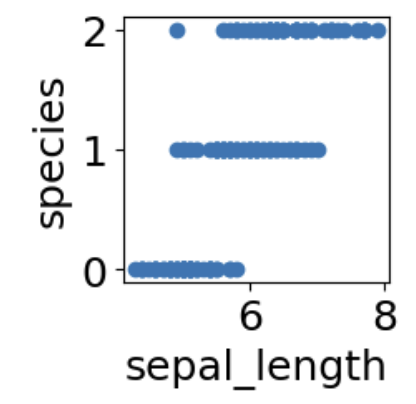

In [ ]:
figure, axes = an.pair_plot(iris_data.headers)
plt.show()

print(f'Do you have a 5x5 grid of plots? {axes.shape[0] == 5 and axes.shape[1] == 5}')

## Task 5: Real-world application

Analyze one real-world dataset of your choice: [e.g. wine quality dataset, Old Faithful geyser dataset, Auto MPG dataset, tips dataset]. Use your **existing** visualization and analysis tools to try to learn something about the real world from this dataset (*you can implement other analyses and explore other visualizations as extensions; see below*). 

- Use scatter plot, pair plot, or other visualizations and determine which helps you learn the most about your dataset.
    - Create at least one "good" graph that presents the data in a helpful way and at least one “bad” graph that is not helpful for gleaning insight into your dataset.
- Briefly (but completely) explain your findings in the Markdown cell below alongside well-labeled graphs that support your conclusions. Explain each variable (its units, its range, mean, stdev, what it means about the world).

In [4]:
# Set the data for analysis
vert_filename = 'data/moreData.csv'
# vert_data = Data(vert_filename, allDataTypes=True)
vert_data = Data(vert_filename)
analysis = Analysis(vert_data)
lengths = [np.sum([vert_data.data[:, vert_data.header2col["part"]] == vert_data.cats2levels["part"].index(level)]) for level in vert_data.cats2levels["part"]]
print(vert_data.cats2levels["part"])
print(lengths)
centrality_by_part = np.array([analysis.l_centrality(["pos_x", "pos_y", "pos_z"], rows=(np.arange(1043841)[vert_data.data[:, vert_data.header2col["part"]] == i])[np.random.randint(0, lengths[i], 500)], metric=Analysis.l2_norm).tolist() for i in range(len(vert_data.cats2levels["part"]))]) 
print(centrality_by_part)
print(np.mean(centrality_by_part, axis=1))
print(np.std(centrality_by_part, axis=1))

Reading data from file: data/moreData.csv
Invalid data type: string
Ignoring Column.
Data extracted from file. 
Now processing data...
Data processing complete!
['Hair', 'Head', 'LeftArm', 'LeftLeg', 'RightArm', 'RightLeg', 'Torso']
[92393, 40115, 15159, 14615, 15159, 14615, 851785]
[[34.45752764 31.7450436  37.99138304 ... 33.18173065 39.37932821
  31.44625749]
 [21.172951   20.87128242 21.84345669 ... 21.53824601 22.36937044
  23.34862707]
 [12.36929456  9.12463731 10.06102087 ...  9.09241283 12.11238441
  12.32492081]
 ...
 [ 9.14511684 10.11512457  8.43011038 ... 10.84525781 12.19898299
  10.18481497]
 [ 9.89779602  8.38378447 10.8451254  ... 10.25043531  9.03059051
   7.0523713 ]
 [15.16094041 14.2291712  17.80013781 ... 17.55114956 17.4495608
  18.59653266]]
[36.19475753 21.96646647  9.97421665  8.10480205  9.95469204  8.36287765
 15.86399202]
[3.46715257 1.00518718 1.3607079  1.32083931 1.29854024 1.19536427
 2.16547538]


In [5]:
print(centrality_by_part.shape)
print(vert_data.cats2levels["part"])
print(np.mean(centrality_by_part, axis=1))
print(np.std(centrality_by_part, axis=1))

(7, 500)
['Hair', 'Head', 'LeftArm', 'LeftLeg', 'RightArm', 'RightLeg', 'Torso']
[36.19475753 21.96646647  9.97421665  8.10480205  9.95469204  8.36287765
 15.86399202]
[3.46715257 1.00518718 1.3607079  1.32083931 1.29854024 1.19536427
 2.16547538]


In [6]:
# Alt data
vert_alt_data = Data(vert_filename, allDataTypes=True)
sample_count = vert_alt_data.data.shape[0]
index_col = np.arange(sample_count)
amp_data = np.append(index_col.reshape(sample_count, 1), vert_alt_data.get_all_data(), axis=1)
indexed_positions = Data(data=amp_data[:, 0:4].astype(dtype=float), headers=(["index"] + vert_alt_data.headers[0:4]), header2col={
    "index": 0, vert_alt_data.headers[0]: 1, vert_alt_data.headers[1]: 2, vert_alt_data.headers[2]: 3, vert_alt_data.headers[3]: 4
}, )
indexed_faces = Data(data=amp_data[:, [0,5]], headers=(["index"] + [vert_alt_data.headers[4]]), header2col={"index": 0, vert_alt_data.headers[4]: 1})
print("Indexed Positions")
print(indexed_positions.get_all_data())
print("Indexed Faces")
print(indexed_faces.get_all_data())


Reading data from file: data/moreData.csv
Data extracted from file. 
Now processing data...
Data processing complete!
Indexed Positions
[[ 0.000000e+00 -5.946000e+00  4.555700e+01  8.964000e+00]
 [ 1.000000e+00 -5.936000e+00  4.559300e+01  8.946000e+00]
 [ 2.000000e+00 -5.934000e+00  4.558200e+01  8.926000e+00]
 ...
 [ 1.043838e+06  4.572000e+00  2.614600e+01  7.200000e-01]
 [ 1.043839e+06  4.571000e+00  2.613300e+01  7.240000e-01]
 [ 1.043840e+06  4.569000e+00  2.612200e+01  7.280000e-01]]
Indexed Faces
[['0'
  '[[(-5.946|45.557|8.964)~(-5.936|45.593|8.946)~(-5.934|45.582|8.926)~(-5.944|45.546|8.944)];[(-5.946|45.557|8.964)~(-5.944|45.546|8.944)~(-5.953|45.511|8.963)~(-5.955|45.521|8.982)];[(-5.946|45.557|8.964)~(-5.951|45.568|8.985)~(-5.941|45.604|8.967)~(-5.936|45.593|8.946)];[(-5.946|45.557|8.964)~(-5.955|45.521|8.982)~(-5.961|45.533|9.003)~(-5.951|45.568|8.985)]]']
 ['1'
  '[[(-5.946|45.557|8.964)~(-5.936|45.593|8.946)~(-5.934|45.582|8.926)~(-5.944|45.546|8.944)];[(-5.936|45.593|8

In [7]:
print(indexed_faces.get_all_data()[0,1].split(";")[0].split("~")[0].split("|"))
# print(indexed_faces.get_all_data()[0,1].split(";")[0].split("~")[0].split("|"))
face_dict = {int(vert): [[[float(pos.strip("[( ')]")) for pos in point_string.split("|")] for point_string in face_string.split("~")] for face_string in face_set_string.split(";")] for vert, face_set_string in zip(*(indexed_faces.get_all_data().T.tolist()))}
# vert_alt_analysis = Analysis(vert_alt_data)

['[[(-5.946', '45.557', '8.964)']


In [8]:
for i in range(10):
    print(f"Vertex {i} Included Faces: {face_dict[i]}")

Vertex 0 Included Faces: [[[-5.946, 45.557, 8.964], [-5.936, 45.593, 8.946], [-5.934, 45.582, 8.926], [-5.944, 45.546, 8.944]], [[-5.946, 45.557, 8.964], [-5.944, 45.546, 8.944], [-5.953, 45.511, 8.963], [-5.955, 45.521, 8.982]], [[-5.946, 45.557, 8.964], [-5.951, 45.568, 8.985], [-5.941, 45.604, 8.967], [-5.936, 45.593, 8.946]], [[-5.946, 45.557, 8.964], [-5.955, 45.521, 8.982], [-5.961, 45.533, 9.003], [-5.951, 45.568, 8.985]]]
Vertex 1 Included Faces: [[[-5.946, 45.557, 8.964], [-5.936, 45.593, 8.946], [-5.934, 45.582, 8.926], [-5.944, 45.546, 8.944]], [[-5.936, 45.593, 8.946], [-5.927, 45.628, 8.928], [-5.925, 45.618, 8.908], [-5.934, 45.582, 8.926]], [[-5.946, 45.557, 8.964], [-5.951, 45.568, 8.985], [-5.941, 45.604, 8.967], [-5.936, 45.593, 8.946]], [[-5.936, 45.593, 8.946], [-5.941, 45.604, 8.967], [-5.932, 45.639, 8.949], [-5.927, 45.628, 8.928]]]
Vertex 2 Included Faces: [[[-5.946, 45.557, 8.964], [-5.936, 45.593, 8.946], [-5.934, 45.582, 8.926], [-5.944, 45.546, 8.944]], [[-5

In [9]:
vertex_dict = {str(vert_coord): int(vert) for vert, vert_coord in zip(np.squeeze(indexed_positions.select_data(["index"])).tolist(), indexed_positions.select_data(["pos_x", "pos_y", "pos_z"]).tolist())}

In [10]:
for i in list(vertex_dict.keys())[:10]:
    print(f"Vertex {i} index: {vertex_dict[i]}")

Vertex [-5.946, 45.557, 8.964] index: 0
Vertex [-5.936, 45.593, 8.946] index: 1
Vertex [-5.934, 45.582, 8.926] index: 2
Vertex [-5.944, 45.546, 8.944] index: 3
Vertex [-5.927, 45.628, 8.928] index: 4
Vertex [-5.925, 45.618, 8.908] index: 5
Vertex [-5.918, 45.663, 8.911] index: 6
Vertex [-5.916, 45.653, 8.891] index: 7
Vertex [-5.909, 45.698, 8.894] index: 8
Vertex [-5.907, 45.688, 8.874] index: 9


In [11]:
face_dict_index = {vert: [[vertex_dict[str(vert_coord)] for vert_coord in vert_set] for vert_set in face_set] for vert, face_set in face_dict.items()}

In [12]:
for i in range(10000):
    print(f"Vertex {i} Included Faces: {face_dict_index[i]}")

Vertex 0 Included Faces: [[0, 1, 2, 3], [0, 3, 977, 978], [0, 23745, 23746, 1], [0, 978, 23873, 23745]]
Vertex 1 Included Faces: [[0, 1, 2, 3], [1, 4, 5, 2], [0, 23745, 23746, 1], [1, 23746, 23753, 4]]
Vertex 2 Included Faces: [[0, 1, 2, 3], [1, 4, 5, 2], [3, 2, 10, 11], [2, 5, 12, 10]]
Vertex 3 Included Faces: [[0, 1, 2, 3], [3, 2, 10, 11], [0, 3, 977, 978], [3, 11, 979, 977]]
Vertex 4 Included Faces: [[1, 4, 5, 2], [4, 6, 7, 5], [1, 23746, 23753, 4], [4, 23753, 23757, 6]]
Vertex 5 Included Faces: [[1, 4, 5, 2], [4, 6, 7, 5], [2, 5, 12, 10], [5, 7, 13, 12]]
Vertex 6 Included Faces: [[4, 6, 7, 5], [6, 8, 9, 7], [4, 23753, 23757, 6], [6, 23757, 23761, 8]]
Vertex 7 Included Faces: [[4, 6, 7, 5], [6, 8, 9, 7], [5, 7, 13, 12], [7, 9, 14, 13]]
Vertex 8 Included Faces: [[6, 8, 9, 7], [8, 40, 41, 9], [6, 23757, 23761, 8], [23802, 40, 8, 23761]]
Vertex 9 Included Faces: [[6, 8, 9, 7], [7, 9, 14, 13], [8, 40, 41, 9], [9, 41, 42, 14]]
Vertex 10 Included Faces: [[3, 2, 10, 11], [2, 5, 12, 10], [1

In [21]:
listo = []
ref_list = list(face_dict_index.values())
for i in ref_list:
    for j in i:
        listo.append(j)
all_faces = np.array(listo, dtype=object)
unique_faces = np.unique(all_faces)
face_lib = {f"face{i}": face for i, face in enumerate(unique_faces)}
reverse_face_lib = {str(face): str(f"face{i}") for i, face in enumerate(unique_faces)}

In [22]:
for i in list(face_lib.keys())[:100]:
    print(f"Face {i} vertices: {face_lib[i]}")
for i in list(reverse_face_lib.keys())[:1000]:
    print(f"Face {i} vertices: {reverse_face_lib[i]}")

Face face0 vertices: [0, 1, 2, 3]
Face face1 vertices: [0, 3, 977, 978]
Face face2 vertices: [0, 978, 23873, 23745]
Face face3 vertices: [0, 23745, 23746, 1]
Face face4 vertices: [1, 4, 5, 2]
Face face5 vertices: [1, 23746, 23753, 4]
Face face6 vertices: [2, 5, 12, 10]
Face face7 vertices: [3, 2, 10, 11]
Face face8 vertices: [3, 11, 979, 977]
Face face9 vertices: [4, 6, 7, 5]
Face face10 vertices: [4, 23753, 23757, 6]
Face face11 vertices: [5, 7, 13, 12]
Face face12 vertices: [6, 8, 9, 7]
Face face13 vertices: [6, 23757, 23761, 8]
Face face14 vertices: [7, 9, 14, 13]
Face face15 vertices: [8, 40, 41, 9]
Face face16 vertices: [9, 41, 42, 14]
Face face17 vertices: [10, 12, 17, 15]
Face face18 vertices: [11, 10, 15, 16]
Face face19 vertices: [11, 16, 980, 979]
Face face20 vertices: [12, 13, 18, 17]
Face face21 vertices: [13, 14, 19, 18]
Face face22 vertices: [14, 42, 43, 19]
Face face23 vertices: [15, 17, 22, 20]
Face face24 vertices: [16, 15, 20, 21]
Face face25 vertices: [16, 21, 981, 9

In [15]:
def shoelace_area(coords):
    """
    
    """
    # These are both implementations of the shoelace formula.
    # The first is a standard vector cross product implementation. 
    # Whereas, the second is a much faster implementation using numpy's einsum function and my formulation of the exterior product.
    
    '''
    coords = np.array(coords)
    pre = np.sum([np.cross(coords[k], coords[k+1]) for k in range(-1, len(coords)-1)], axis=0)
    return 0.5 * np.sqrt(np.einsum("i,i->", pre, pre))
    '''
    coords = np.array(coords)    
    exterior_product = [(np.einsum('i,j->ij', coords[k], coords[k+1]) - np.einsum('i,j->ij', coords[k+1], coords[k],)) for k in range(-1, len(coords)-1)]
    sums = np.sum(exterior_product, axis=0)
    area =  0.5 * np.sqrt(0.5 * np.einsum("ij,ij->", sums, sums))
    return area
    

face_areas = {face: shoelace_area(np.array([indexed_positions.data[vert,1:] for vert in face_lib[face]])) for face in face_lib.keys()}

In [16]:
for i in list(face_areas.keys())[:100]:
    print(f"Face {i} area: {face_areas[i]}")

Face face0 area: 0.0009501284123575327
Face face1 area: 0.0009123895823083558
Face face2 area: 0.001005025745957354
Face face3 area: 0.0010042987603655176
Face face4 area: 0.0009253795167723054
Face face5 area: 0.000977428258237302
Face face6 area: 0.0008508307704928585
Face face7 area: 0.0008508307704946791
Face face8 area: 0.0008722691671830554
Face face9 area: 0.0008965578620442593
Face face10 area: 0.0009674585262423977
Face face11 area: 0.0008417948087231277
Face face12 area: 0.0008965578620386085
Face face13 area: 0.0009473721549243722
Face face14 area: 0.0008563003269824266
Face face15 area: 0.0008263658390532939
Face face16 area: 0.0008048238938111917
Face face17 area: 0.0008609883855046612
Face face18 area: 0.0008558995267986361
Face face19 area: 0.0008425663178820106
Face face20 area: 0.0008391437600329161
Face face21 area: 0.0008238021607400385
Face face22 area: 0.000780142294711169
Face face23 area: 0.0008433629112231381
Face face24 area: 0.000830696846021962
Face face25 ar

In [26]:
print(5)
average_vertex_areas = np.array([[vert, vert_data.data[vert, vert_data.header2col["part"]], np.mean(np.array([face_areas[reverse_face_lib[str(face)]] for face in face_dict_index[vert]]))] for vert in range(1043841)])
print(average_vertex_areas)

5
[[0.00000000e+00 0.00000000e+00 9.67960625e-04]
 [1.00000000e+00 0.00000000e+00 9.64308737e-04]
 [2.00000000e+00 0.00000000e+00 8.94292368e-04]
 ...
 [1.04383800e+06 6.00000000e+00 2.17184331e-04]
 [1.04383900e+06 6.00000000e+00 2.18298447e-04]
 [1.04384000e+06 6.00000000e+00 2.11912975e-04]]


In [39]:
average_vertex_areas_mean_by_category = np.array([np.mean(average_vertex_areas[average_vertex_areas[:,1].astype(int) == vert_data.cats2level_dicts["part"][i] ,2], axis=0) for i in vert_data.cats2levels["part"]])
average_vertex_areas_stdev_by_category = np.array([np.std(average_vertex_areas[average_vertex_areas[:,1].astype(int) == vert_data.cats2level_dicts["part"][i] ,2], axis=0) for i in vert_data.cats2levels["part"]])

In [40]:
print(5)
print(average_vertex_areas)
print("sdf")
print(average_vertex_areas_mean_by_category)
print(average_vertex_areas_stdev_by_category)

5
[[0.00000000e+00 0.00000000e+00 9.67960625e-04]
 [1.00000000e+00 0.00000000e+00 9.64308737e-04]
 [2.00000000e+00 0.00000000e+00 8.94292368e-04]
 ...
 [1.04383800e+06 6.00000000e+00 2.17184331e-04]
 [1.04383900e+06 6.00000000e+00 2.18298447e-04]
 [1.04384000e+06 6.00000000e+00 2.11912975e-04]]
sdf
[0.04503005 0.03823653 0.01158771 0.01064919 0.01158796 0.01064914
 0.00108751]
[0.08275936 0.04826973 0.01413499 0.02424998 0.01413534 0.02424994
 0.00787091]


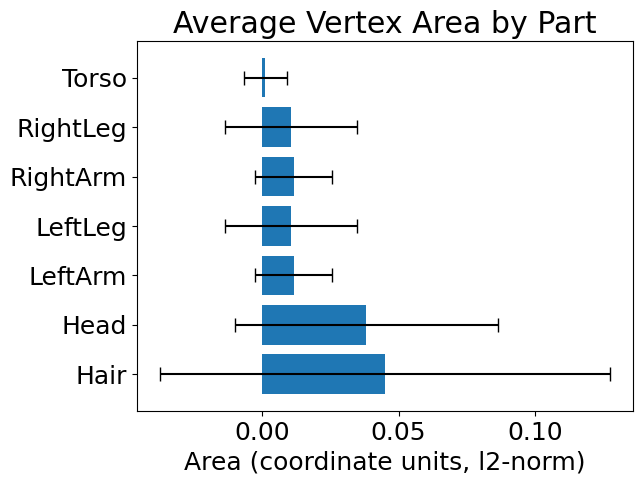

In [41]:
import matplotlib.pyplot as plt
plt.barh(vert_data.cats2levels["part"], average_vertex_areas_mean_by_category, xerr=average_vertex_areas_stdev_by_category, capsize=5)
plt.title("Average Vertex Area by Part")
plt.xlabel("Area (coordinate units, l2-norm)")
plt.show()

Centrality Tests:

This was an hour and a half runtime on my PC. Which has super high specs. If I were you, I'd try to run it with a smaller sample size.

In [ ]:
ref_array = np.arange(vert_data.data.shape[0])
output_array = np.ndarray((0,len(vert_data.cats2levels["part"])))
for trial in range(200):
    centrality_by_part = np.array([analysis.l_centrality(["pos_x", "pos_y", "pos_z"], rows=(ref_array[vert_data.data[:, vert_data.header2col["part"]] == i])[np.random.randint(0, lengths[i], 1000)], metric=Analysis.l2_norm).tolist() for i in range(len(vert_data.cats2levels["part"]))]) 
    output_array = np.append(output_array, centrality_by_part.T, axis=0)


In [ ]:
print(output_array.shape)
print(np.mean(output_array, axis=0))
print(np.std(output_array, axis=0))

In [ ]:
plt.barh(vert_data.cats2levels["part"], np.mean(output_array, axis=0), xerr=np.std(output_array, axis=0), capsize=5)
plt.title("Centrality by Part")
plt.xlabel("Centrality (coordinate units, l2-norm)")
plt.show()

**Explain your findings here:**

## Extensions

### a. AI Policy

The goal of extensions is to learn and create something new beyond the base project that excites you. To serve this goal and out of fairness to your hardworking classmates, **AI (e.g. ChatGPT, Copilot, etc.) should NOT be used in ANY way on this project and extensions.** This includes both written analysis, plotting, and code. We will only grade **your** work, not the AI's. **We will stop grading your project if we notice AI-generated content (to any capacity).**

### b. Guidelines

To receive credit for any extension, you must:
1. Not modify / prevent any code from the core project from working (e.g. make a copy before changing). In other words, **the notebook test code should still work!**
2. **You must describe what you did and what you found in detail**. This includes a summary of parameter values used in your simulations.
3. Include (*labeled!*) plots and/or numbers to present your results.
4. Write up your extensions below or in a separate notebook.
5. Give kudos to all sources, including anyone that you consulted.

### c. Suggestions

**Rule of thumb: one deep, thorough extension is worth more than several quick, shallow extensions!**

The ideas below are **suggested** extensions — feel free to go in another direction related to this project that is not listed!

### 1. More visualizations

Research and create more visualizations of data. If we haven't talked about it in class, all the better! This could be in the matplotlib API or something you build yourself (probably a better extension).

### 2. More summary statistics

Research, implement, and apply additional ways to quantitatively summarize a dataset. Compare these other techniques with those that you implemented in this project.

### 3. More datasets

Analyze and visualize additional datasets. Document and report on insights/hypothesized relationships that you may have discovered.

### 4. Anscombe's Quartet

Despite the visual dissimilarity of the data samples in each group of points, the groups of data have many identical (or nearly identical) summary statistics! Use you analysis code to verify this. Explain what it means / why it happens. Research additional statistics that are identical in the quartet, then implement and verify their similarity.  

### 5. Filtering dataset by categorical variable.

It is also possible to generate the Anscombe's Quartet plot by taking advantage of the `dataset` categorical variable: only plot samples in a particular subplot panel that have a `dataset` value of either `I`, `II`, `III` or `IV`). In other words, only plot a filtered version of the dataset based on the categorical data value.

As an extension, you can also run analyses after filter other datasets based on categorical data values (e.g. compute the mean of numeric variables that have the same value of a categorical variable).

### 6. Additional data types

You wrote `Data` to only store numeric and categorical data types. Extend your `Data` class to correctly parse and represent dates, strings, and other types of data.

NOTE: You will definitely want to make a copy of your `Data` class before attempting this!

### 7. Joint plot

Use matplotlib to create a [jointplot](https://seaborn.pydata.org/_images/jointplot_1_0.png): a scatter plot of numeric data that has histograms on the top and right side showing the number of samples that fall within different intervals ("bins"). The top histogram shows the distribution of the "x" variable and the right histogram shows the distribution of the "y" variable. Once you implement a joint plot, show how it can be useful (vs. just a scatter plot) to glean insight about a dataset of your choice.